In [1]:
import pandas as pd # Pandas es una biblioteca de análisis y manipulación de datos.
import numpy as np # Numpy es una biblioteca para el cálculo numérico en Python.
import matplotlib.pyplot as plt # Matplotlib es una biblioteca para la creación de gráficos en Python.
from scipy.stats import norm # La distribución normal es una distribución de probabilidad continua que se utiliza ampliamente en estadística.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
cs_df = pd.read_csv(name, sep=",", encoding='UTF-8')

Saving DF_CS_ARREGLADO.csv to DF_CS_ARREGLADO.csv


count    666.000000
mean      79.792793
std       20.357017
min        6.000000
25%       68.000000
50%       86.000000
75%       94.000000
max      114.000000
Name: RoundKills, dtype: float64


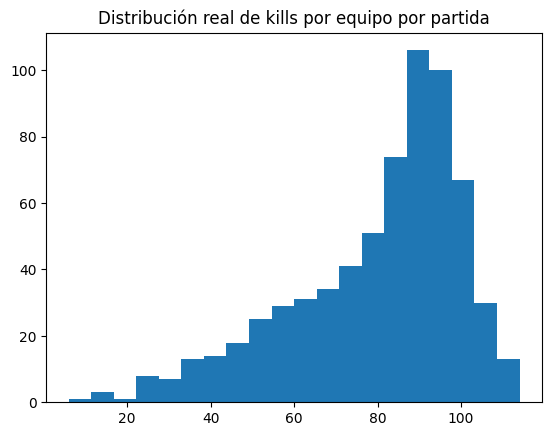

In [3]:
datos = cs_df.groupby(['MatchId', 'InternalTeamId']).agg({
    'RoundKills': 'sum',
    'TeamStartingEquipmentValue': 'mean',
    'PrimarySniperRifle': 'mean',
    'RLethalGrenadesThrown': 'sum',
    'RNonLethalGrenadesThrown': 'sum',
    'PrimaryHeavy': 'mean',
    'PrimarySMG': 'mean',
    'PrimaryPistol': 'mean'
}).reset_index()
print(datos['RoundKills'].describe())
plt.hist(datos['RoundKills'], bins=20)
plt.title('Distribución real de kills por equipo por partida')
plt.show()

# KNN

# Modelamiento

In [6]:
# Crear columna binaria de si el equipo ganó el match
ganadores = cs_df[['MatchId', 'InternalTeamId', 'MatchWinner']].drop_duplicates()
ganadores['WonMatch'] = (ganadores['InternalTeamId'] == ganadores['MatchWinner']).astype(int)

# Unir con los datos agregados
datos = datos.merge(
    ganadores[['MatchId', 'InternalTeamId', 'WonMatch']],
    on=['MatchId', 'InternalTeamId'],
    how='left'
)


In [7]:
features = [
    'RoundKills',
    'TeamStartingEquipmentValue',
    'PrimarySniperRifle',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'PrimaryHeavy',
    'PrimarySMG',
    'PrimaryPistol'
]

X = datos[features]
y = datos['WonMatch']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    scores.append(score)

# Observ

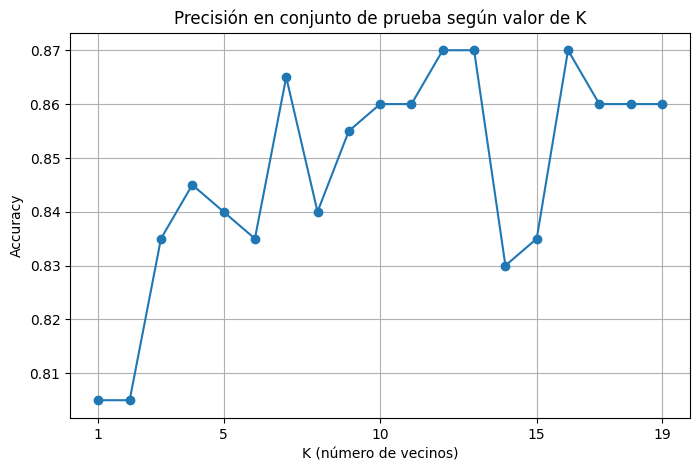

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o')
plt.title('Precisión en conjunto de prueba según valor de K')
plt.xlabel('K (número de vecinos)')
plt.ylabel('Accuracy')
plt.xticks([1,5,10,15,19])
plt.grid(True)
plt.show()



El gráfico muestra cómo varía la precisión del modelo KNN al cambiar el número de vecinos (K). Se observa que con valores bajos de K, la precisión es menor, pero a medida que K aumenta, la precisión mejora y se estabiliza. El mejor rendimiento se alcanza con K entre 13 y 16, llegando a una precisión de 0.87. Esto indica que el modelo funciona mejor cuando considera más vecinos para tomar una decisión, ya que eso le permite hacer predicciones más confiables.
